# Embedded pairs for optimal SSPERK$(s,2)$ methods

The embedded pairs for SSPERK$(s,2)$ methods are 

$$b_1^T=\left(\frac{1}{s-1},\ldots,\frac{1}{s-1},0\right)\quad \text{and}\ \quad b_2^T=\left(\frac{s+1}{s^2},\frac{1}{s},\ldots,\frac{1}{s},\frac{s-1}{s^2}\right).$$

We compare our embedded methods and the original method based on the stability radius values.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from nodepy import rk
import numpy as np
import math

Text(0.5, 1, 'Absolute stability region - b_2 pair')

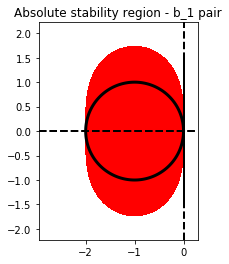

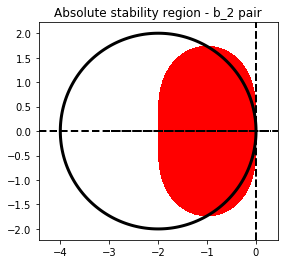

In [15]:
## SSPERK(s,2) methods
s = 2
rk2 = rk.SSPRK2(s)
#print(rk2)

## Embedded pair - b_1
b_1 = 1./(s-1) * np.ones(s); b_1[s-1]=0;
#print(b1)
rk_b_1_pair = rk.ExplicitRungeKuttaPair(rk2.A,rk2.b,b_1)
# Stability region and save as an eps file
fig1=rk_b_1_pair.plot_stability_region(N=1000);
fig1.axes[0].set_title('Absolute stability region - b_1 pair')
#fig1.axes[0].set_title('')
#plt.savefig('SSPERKs2.eps', format='eps', dpi=10000)

## Embedded pair - b_2
b_2 = 1./(s) * np.ones(s); b_2[0]=(s+1.)/(s*s); b_2[s-1]=(s-1.)/(s*s);
#print(b2)
# Stability region and save to a file
rk_b_2_pair = rk.ExplicitRungeKuttaPair(rk2.A,rk2.b,b_2)
fig2=rk_b_2_pair.plot_stability_region(N=1000);
fig2.axes[0].set_title('Absolute stability region - b_2 pair')
#fig2.axes[0].set_title('')
#plt.savefig('SSPERKs2b.eps', format='eps', dpi=10000)



In [4]:
## Real stability interval, Imaginary stability interval, Circle contractivity radius
print('The SSPERK(s,2) method - stability radius values')
print(rk2.__num__().real_stability_interval(mode='float'))
print(rk2.__num__().imaginary_stability_interval(mode='float'))
print(rk2.__num__().circle_contractivity_radius())
print(rk2.__num__().absolute_monotonicity_radius())

print('\n')
print('b_1 stability radius values')
print(rk_b_1_pair.embedded_method.__num__().real_stability_interval(mode='float'))
print(rk_b_1_pair.embedded_method.__num__().imaginary_stability_interval(mode='float'))
print(rk_b_1_pair.embedded_method.__num__().circle_contractivity_radius())
print(rk_b_1_pair.embedded_method.__num__().absolute_monotonicity_radius())

print('\n')
print('b_2 stability radius values')
print(rk_b_2_pair.embedded_method.__num__().real_stability_interval(mode='float'))
print(rk_b_2_pair.embedded_method.__num__().imaginary_stability_interval(mode='float'))
print(rk_b_2_pair.embedded_method.__num__().circle_contractivity_radius())
print(rk_b_2_pair.embedded_method.__num__().absolute_monotonicity_radius())


The SSPERK(s,2) method - stability radius values
1.9999999999999996
2.9802322387695306e-08
1.0000000000000009
0.9999999999308784


b_1 stability radius values
2.0
0
1.0000000000000009
0.9999999999308784


b_2 stability radius values
4.000000000000001
0
1.267949192431117
0.9999999999308784


We compare our embedded methods and the original method based on the error metric values.

In [16]:
## The common metric values for the original method and the embedded methods 
rk2 = rk.SSPRK2(s)
original=rk2.error_metrics()
print('SSPERK(s,2) error metric values')
print([float(original[i]) for i in range(len(original))])
print('\n')
rk2.b=b_1
embedded1=rk2.error_metrics()
print('b_1 error metric values')
print([float(embedded1[i]) for i in range(len(embedded1))])
print('\n')
rk2.b=b_2
embedded2=rk2.error_metrics()
print('b_2 error metric values')
print([float(embedded2[i]) for i in range(len(embedded2))])

main method has order 2
SSPERK(s,2) error metric values
[0.18633899812498247, 0.16666666666666666, 0.14433756729740643, 0.125, 1.0]


main method has order 1
b_1 error metric values
[0.5, 0.5, 0.23570226039551584, 0.16666666666666666, 1.0]


main method has order 1
b_2 error metric values
[0.25, 0.25, 0.1717960677340692, 0.16666666666666666, 1.0]
